<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; background-color:blue; color:white; font-size:1.7rem ">
        <b>  Modelling </b>
    </div>
</div>


<div style=" width:80% ; margin:auto ">
    <div style = " text-align:center; color:white; font-size:1.7rem ">
        <b> PROJET MACHINE LEARNING II  </b>
    </div>
</div>


</div>
<h1 style = "text-align:center;color:tomato;font-family:century;font-size:35px;">Groupe 1</h1>

# <font color='blue'> 1. Importations des librairies </font>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns

In [8]:
#data = pd.read_csv(Path(DATA_DIR, "Churn_Modelling.csv"), sep=",")
data = pd.read_csv("C:\\Users\DELL\\Documents\ISE2\\projet_ML2_groupe1_2024\\data\\train_modele.csv", usecols = lambda x: x not in ["id", 'CustomerId', 'Surname'])

df = data.copy()
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


# <font color='blue'> 2. Préprocessing </font>

In [9]:
def Metrics(model, X_train, y_train, X_test, y_test):
    # Get best estimator
    best_model = model.best_estimator_
    # Get best param
    best_param = model.best_params_
    # Predict on test set
    y_pred = best_model.predict(X_test)
    y_train_pred_best = best_model.predict(X_train)
    y_test_pred_best = best_model.predict(X_test)

    # Compute evaluation metrics
    
    print("Metriques obtenues sur le train")
    print(classification_report(y_train, y_train_pred_best)) 
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred)
    print("Metriques obtenues sur le test")
    print('Accuracy: ', accuracy)
    print('F1 Score: ', f1)
    print('AUC(ROC): ', roc_auc)
    print()
    print("Classification Report: ")
    print(classification_report(y_test, y_test_pred_best))

     ## ROC AUC
    prob = best_model.predict_proba(X_test)  
    prob = prob[:, 1]
    fper, tper, _ = roc_curve(y_test, prob)
    auc_scr = auc(fper, tper)

    fig, axes = plt.subplots(1, 2, figsize = (12, 6))
    axes[0].plot(fper, tper, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_scr)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC) Curve')
    axes[0].legend(loc="lower right")
    
    sns.heatmap(confusion_matrix(y_test, y_pred), ax = axes[1], annot = True, cbar = False, fmt='.0f')
    axes[1].set_xlabel('Predicted labels')
    axes[1].set_ylabel('Actual labels')
    
    plt.show()
    
    # Return evaluation metrics
    return accuracy, f1, roc_auc

## Data Split

In [10]:
from sklearn.model_selection import train_test_split
# Diviser les données en variables explicatives (X) et variable cible (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Diviser les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Création du pipeline de prétraitement
preprocessor = ColumnTransformer(
    transformers=[
        ('gender', OneHotEncoder(drop='first'), ['Gender']),  # Encodage One-Hot pour 'Gender'
        ('geography', OneHotEncoder(drop='first'), ['Geography']),  # Encodage One-Hot pour 'Geography'
        #('num', StandardScaler(), ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])  # Normalisation des variables numériques
    ],
    remainder='passthrough'  # Laisser les autres colonnes telles quelles
)

# Affichage du pipeline pour vérifier
preprocessor


ColumnTransformer(remainder='passthrough',
                  transformers=[('gender', OneHotEncoder(drop='first'),
                                 ['Gender']),
                                ('geography', OneHotEncoder(drop='first'),
                                 ['Geography'])])

In [11]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report

## KNN

In [103]:
from sklearn.neighbors import KNeighborsClassifier

In [104]:
# Construction du pipeline KNN
pipeline_knn = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres des classes
    ('knn', KNeighborsClassifier())  # Classifieur KNN
])

# Afficher le pipeline pour vérification
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('knn', KNeighborsClassifier())])

In [105]:
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('knn', KNeighborsClassifier())])

In [106]:
# Prédictions et évaluation du modèle optimisé sur les ensembles de train et de test
y_train_pred = pipeline_knn.predict(X_train)
y_test_pred = pipeline_knn.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"Optimized KNN - Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
print(classification_report(y_test, y_test_pred))


Optimized KNN - Train Accuracy: 0.8775, Test Accuracy: 0.7951
              precision    recall  f1-score   support

           0       0.91      0.82      0.86     26001
           1       0.51      0.69      0.59      6982

    accuracy                           0.80     32983
   macro avg       0.71      0.75      0.72     32983
weighted avg       0.82      0.80      0.81     32983



Pour le KNN Optimisé, nous avons avons un recall faible correxpondant aux clients qui ont abandonné la banque.

In [107]:
# Définir la grille de paramètres exhaustive
param_grid_knn = {
    'knn__n_neighbors': [2, 5, 6],
    'knn__leaf_size': [10, 20],
    'knn__p': [1, 2],
    'smote__sampling_strategy': [0.7, 1],  # Stratégie d'échantillonnage pour SMOTE
}
# Configuration de la recherche par grille
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)



In [108]:
%%time
# Exécution de la recherche par grille sur les données d'entraînement
grid_search_knn.fit(X_train, y_train)

CPU times: total: 6.53 s
Wall time: 9min 59s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__leaf_size': [10, 20],
                         'knn__n_neighbors': [2, 5, 6], 'knn__p': [1, 2],
                         'smote__sampling_strategy': [0.7, 1]},
             scoring='accuracy')

In [109]:
# Meilleur paramètre
print(f"Best f1 score: {grid_search_knn.best_score_}")
best_param_knn = grid_search_knn.best_params_
print(f"Best parameters for KNN : {best_param_knn}")

Best f1 score: 0.8220620338366382
Best parameters for KNN : {'knn__leaf_size': 10, 'knn__n_neighbors': 6, 'knn__p': 1, 'smote__sampling_strategy': 0.7}


Le modèle KNN a atteint un F1 score de 0.822. ce qui indique une bonne performance en termes d'équilibre entre la précision et le rappel.Le f1 Score est relativement élevé (0.822) . Et les meilleurs paramètres sont knn__leaf_size, knn__n_neighbors, knn__p et smote__sampling_strateg

In [110]:
# Meilleurs paramètres et estimation du modèle
best_knn = grid_search_knn.best_estimator_
best_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('knn',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=6, p=1))])

Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.95      0.91      0.93    104001
           1       0.71      0.81      0.76     27927

    accuracy                           0.89    131928
   macro avg       0.83      0.86      0.84    131928
weighted avg       0.90      0.89      0.89    131928

Metriques obtenues sur le test
Accuracy:  0.820847103053088
F1 Score:  0.8238075650763079
AUC(ROC):  0.7493366410967315

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     26001
           1       0.57      0.63      0.60      6982

    accuracy                           0.82     32983
   macro avg       0.73      0.75      0.74     32983
weighted avg       0.83      0.82      0.82     32983



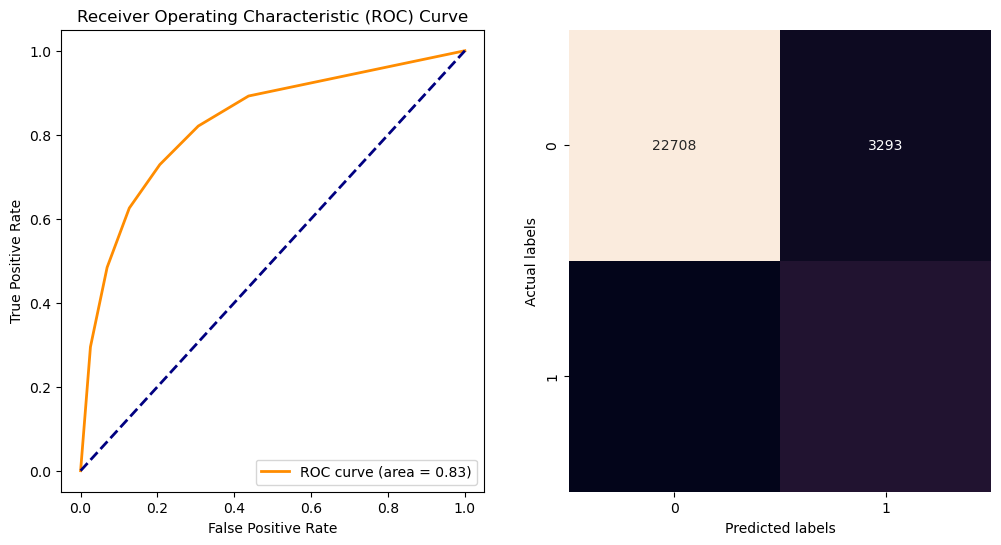

In [111]:
acc, f1, roc_auc = Metrics(grid_search_knn, X_train, y_train, X_test, y_test)

## REGRESSION LOGISTIQUE

In [113]:
from sklearn.linear_model import LogisticRegression

In [114]:
# Construction du pipeline pour la régression logistique
pipeline_logreg = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres des classes
    ('logreg', LogisticRegression(solver='liblinear'))  # Régression logistique
])
# Afficher le pipeline pour vérification
pipeline_logreg


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [115]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('logreg', LogisticRegression(solver='liblinear'))])

In [116]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_logreg = pipeline_logreg.predict(X_train)
y_test_pred_logreg = pipeline_logreg.predict(X_test)

train_acc_logreg = accuracy_score(y_train, y_train_pred_logreg)
test_acc_logreg = accuracy_score(y_test, y_test_pred_logreg)

print(f"Logistic Regression - Train Accuracy: {train_acc_logreg:.4f}, Test Accuracy: {test_acc_logreg:.4f}")
print(classification_report(y_test, y_test_pred_logreg))

Logistic Regression - Train Accuracy: 0.7988, Test Accuracy: 0.7974
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     26001
           1       0.52      0.65      0.58      6982

    accuracy                           0.80     32983
   macro avg       0.71      0.74      0.72     32983
weighted avg       0.82      0.80      0.81     32983



Un recall (rappel) de 0.65 signifie que le modèle Logistic Regression a réussi à identifier correctement 65% des instances positives parmi toutes les instances réellement positives dans le jeu de données. 

In [120]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_logreg = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__max_iter': [ 100, 200 ],
    'smote__sampling_strategy': [0.7, 1]
                    }
# Configuration de la recherche par grille
grid_search_logreg = GridSearchCV(pipeline_logreg, param_grid_logreg, cv=3, scoring='accuracy', n_jobs=-1)

In [121]:
%%time
# Exécution de la recherche par grille sur les données d'entraînement

grid_search_logreg.fit(X_train, y_train)

CPU times: total: 11.7 s
Wall time: 3min 19s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('logreg',
                                        LogisticRegression(solver='liblinear'))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1],
                         'logreg__max_iter': [100, 200],
                         'logreg__penalty': ['l1', 'l2'],
                         'logreg__solver': ['liblinear', 'saga'],
                         'smote__sampling_strategy': [0.7, 1]},
             scoring='accuracy')

In [122]:
# Meilleurs paramètres et estimation du modèle
best_logreg = grid_search_logreg.best_estimator_
best_logreg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('logreg',
                 LogisticRegression(C=0.01, max_iter=200, penalty='l1',
                                    solver='saga'))])

In [123]:
# Meilleur paramètre
print(f"Best f1 score: {grid_search_logreg.best_score_}")
best_param_rl = grid_search_logreg.best_params_
print(f"Best parameters for Logistic Regression : {best_param_rl}")

Best f1 score: 0.7990798011036323
Best parameters for Logistic Regression : {'logreg__C': 0.01, 'logreg__max_iter': 200, 'logreg__penalty': 'l1', 'logreg__solver': 'saga', 'smote__sampling_strategy': 0.7}


Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.90      0.84      0.87    104001
           1       0.52      0.65      0.58     27927

    accuracy                           0.80    131928
   macro avg       0.71      0.74      0.72    131928
weighted avg       0.82      0.80      0.81    131928

Metriques obtenues sur le test
Accuracy:  0.7974411060243155
F1 Score:  0.8052549471786085
AUC(ROC):  0.7428199057544566

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.84      0.87     26001
           1       0.52      0.65      0.58      6982

    accuracy                           0.80     32983
   macro avg       0.71      0.74      0.72     32983
weighted avg       0.82      0.80      0.81     32983



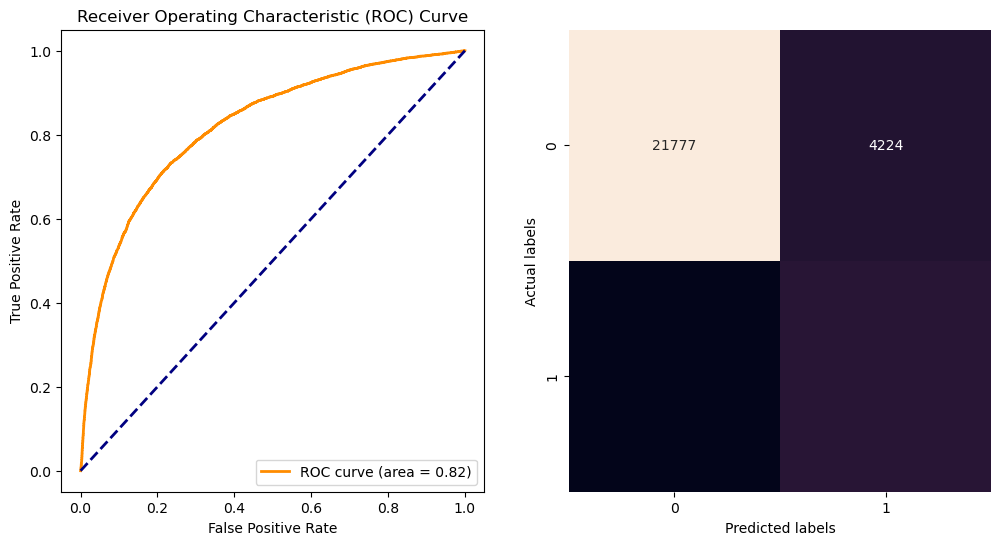

In [124]:
acc, f1, roc_auc = Metrics(grid_search_logreg, X_train, y_train, X_test, y_test)

## XGBOOST

In [126]:
from xgboost import XGBClassifier
# Construction du pipeline pour XGBoost
pipeline_xgb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres des classes
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))  # Classifieur XGBoost
])

# Afficher le pipeline pour vérificatioN
pipeline_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [127]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsa...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [128]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_xgb = pipeline_xgb.predict(X_train)
y_test_pred_xgb = pipeline_xgb.predict(X_test)

train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Train Accuracy: {train_acc_xgb:.4f}, Test Accuracy: {test_acc_xgb:.4f}")
print(classification_report(y_test, y_test_pred_xgb))


XGBoost - Train Accuracy: 0.8742, Test Accuracy: 0.8613
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     26001
           1       0.70      0.61      0.65      6982

    accuracy                           0.86     32983
   macro avg       0.80      0.77      0.78     32983
weighted avg       0.86      0.86      0.86     32983



In [132]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_xgb = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.01, 0.1],
    'xgb__max_depth': [3, 5],
    'xgb__subsample': [0.7, 0.8],
    'xgb__colsample_bytree': [0.7, 0.8],
    'xgb__gamma': [0, 0.1],
    'xgb__min_child_weight': [1, 3],
    'smote__sampling_strategy': [0.7, 1]
}

# Configuration de la recherche par grille
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)

In [133]:
%%time
grid_search_xgb.fit(X_train, y_train)

CPU times: total: 55.8 s
Wall time: 25min 33s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      boost...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'smote__sampling_strategy': [0.7, 1],
                         'xgb__colsample_bytree': [0.7, 0.8],
                         'xgb__gamma': [0, 0.1],
                         'xgb__learning_rate': [0.01, 0.1],
                         'xgb__max_depth': [3, 5],
                         'xgb__min_child_weight': [1, 3],
                         'xgb__n_estimators': [100, 200],
                         'xgb__subsample': [0.7, 0.8]},
             scoring='accuracy')

In [134]:
# Meilleurs paramètres et estimation du modèle
best_xgb = grid_search_xgb.best_estimator_
best_xgb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsa...
                               feature_types=None, gamma=0.1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [135]:
print(f"Best f1 score: {grid_search_xgb.best_score_}")
best_param_xgb = grid_search_xgb.best_params_
print(f"Best parameters for XGBOOST : {best_param_xgb}")

Best f1 score: 0.8611515372021102
Best parameters for XGBOOST : {'smote__sampling_strategy': 0.7, 'xgb__colsample_bytree': 0.8, 'xgb__gamma': 0.1, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__min_child_weight': 3, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}


Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.91      0.93      0.92    104001
           1       0.70      0.64      0.67     27927

    accuracy                           0.87    131928
   macro avg       0.80      0.78      0.79    131928
weighted avg       0.86      0.87      0.86    131928

Metriques obtenues sur le test
Accuracy:  0.8613528181184247
F1 Score:  0.8589279445308773
AUC(ROC):  0.7759184663710409

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26001
           1       0.69      0.63      0.66      6982

    accuracy                           0.86     32983
   macro avg       0.80      0.78      0.79     32983
weighted avg       0.86      0.86      0.86     32983



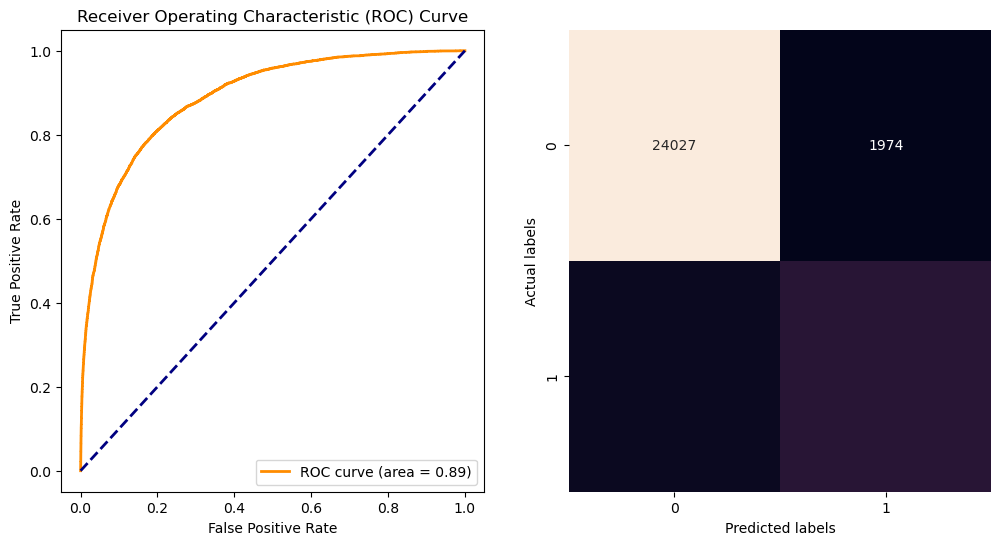

In [136]:
acc, f1, roc_auc = Metrics(grid_search_xgb, X_train, y_train, X_test, y_test)

## Multinomial Naive BAYES 

In [138]:
from sklearn.naive_bayes import MultinomialNB

In [139]:
# Construction du pipeline pour Naive Bayes multinomial
pipeline_nb = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres de classe
    ('nb', MultinomialNB())  # Classifieur Naive Bayes multinomial
])
# Afficher le pipeline pour vérification
pipeline_nb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('nb', MultinomialNB())])

In [140]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_nb.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('nb', MultinomialNB())])

In [141]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_nb = pipeline_nb.predict(X_train)
y_test_pred_nb = pipeline_nb.predict(X_test)

train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
test_acc_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"Naive Bayes Multinomial - Train Accuracy: {train_acc_nb:.4f}, Test Accuracy: {test_acc_nb:.4f}")
print(classification_report(y_test, y_test_pred_nb))


Naive Bayes Multinomial - Train Accuracy: 0.5895, Test Accuracy: 0.5886
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     26001
           1       0.27      0.56      0.37      6982

    accuracy                           0.59     32983
   macro avg       0.55      0.58      0.53     32983
weighted avg       0.72      0.59      0.63     32983



In [142]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_nb = {
    'nb__alpha': [0.1, 0.5, 1.0, 2.0],  # Paramètre de lissage Laplace
    'nb__fit_prior': [True, False], # Si on veut estimer les probabilités a priori à partir des données ou non
    'smote__sampling_strategy': [0.7, 1]  
}
# Configuration de la recherche par grille
grid_search_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=3, scoring='accuracy', n_jobs=-1)

In [143]:

%%time
grid_search_nb.fit(X_train, y_train)

CPU times: total: 1.95 s
Wall time: 7.95 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'nb__alpha': [0.1, 0.5, 1.0, 2.0],
                         'nb__fit_prior': [True, False],
                         'smote__sampling_strategy': [0.7, 1]},
             scoring='accuracy')

In [144]:
# Estimation du modèle
best_nb = grid_search_nb.best_estimator_
best_nb

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('smote', SMOTE(random_state=42, sampling_strategy=1)),
                ('nb', MultinomialNB(alpha=0.1))])

In [145]:
# Meilleurs paramètres
print(f"Best f1 score: {grid_search_nb.best_score_}")
best_param_nb = grid_search_nb.best_params_
print(f"Best parameters for Naive Bayes Multinomial: {best_param_nb}")

Best f1 score: 0.5894730459038263
Best parameters for Naive Bayes Multinomial: {'nb__alpha': 0.1, 'nb__fit_prior': True, 'smote__sampling_strategy': 1}


Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.84      0.60      0.70    104001
           1       0.27      0.56      0.37     27927

    accuracy                           0.59    131928
   macro avg       0.55      0.58      0.53    131928
weighted avg       0.72      0.59      0.63    131928

Metriques obtenues sur le test
Accuracy:  0.588575933056423
F1 Score:  0.6257532899728937
AUC(ROC):  0.5790193838368003

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.60      0.70     26001
           1       0.27      0.56      0.37      6982

    accuracy                           0.59     32983
   macro avg       0.55      0.58      0.53     32983
weighted avg       0.72      0.59      0.63     32983



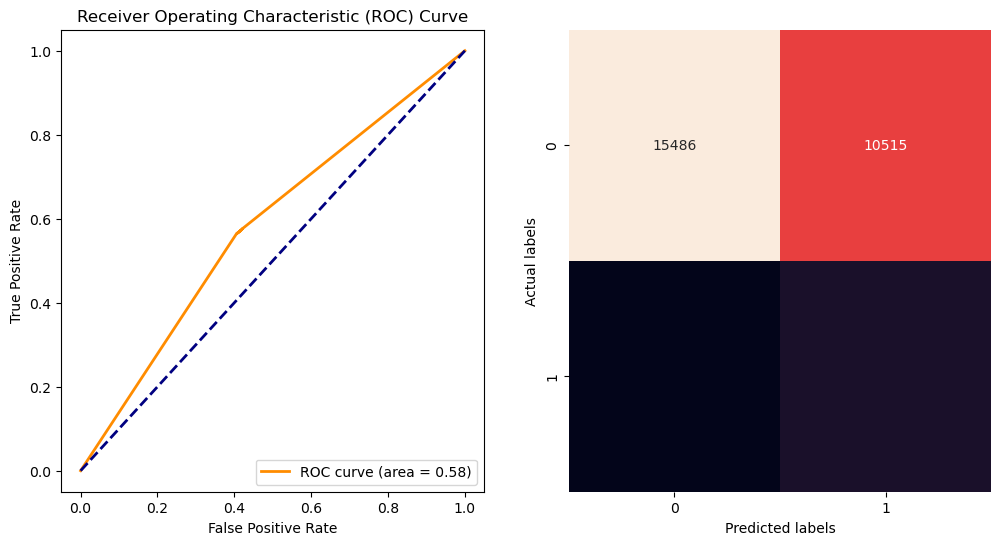

In [146]:
acc, f1, roc_auc = Metrics(grid_search_nb, X_train, y_train, X_test, y_test)

## DECISION TREE

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
# Construction du pipeline pour l'arbre de décision
pipeline_tree = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres de classe
    ('tree', DecisionTreeClassifier())  # Classifieur Arbre de Décision
])
pipeline_tree


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('tree', DecisionTreeClassifier())])

In [150]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('tree', DecisionTreeClassifier())])

In [151]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_tree = pipeline_tree.predict(X_train)
y_test_pred_tree = pipeline_tree.predict(X_test)

train_acc_tree = accuracy_score(y_train, y_train_pred_tree)
test_acc_tree = accuracy_score(y_test, y_test_pred_tree)

print(f"Decision Tree - Train Accuracy: {train_acc_tree:.4f}, Test Accuracy: {test_acc_tree:.4f}")
print(classification_report(y_test, y_test_pred_tree))


Decision Tree - Train Accuracy: 0.9997, Test Accuracy: 0.7921
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     26001
           1       0.51      0.55      0.53      6982

    accuracy                           0.79     32983
   macro avg       0.69      0.71      0.70     32983
weighted avg       0.80      0.79      0.80     32983



- Avec un recall de 0.55 pour les bonnes prédictions , nous pouvons dire que  le modèle a réussi à identifier correctement 55% des instances positives parmi toutes les instances réellement positives dans le jeu de données.

In [152]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_tree = {
    'tree__criterion': ['gini', 'entropy'],  # Méthode de mesure de la qualité de la scission
    'tree__max_depth': [None, 3, 6],  # Profondeur maximale de l'arbre
    'tree__min_samples_split': [2, 3],  # Nombre minimal d'échantillons requis pour diviser un nœud interne
    'tree__min_samples_leaf': [1, 2], # Nombre minimal d'échantillons requis pour être à un nœud feuille
    'smote__sampling_strategy': [0.7, 1] 
}
# Configuration de la recherche par grille
grid_search_tree = GridSearchCV(pipeline_tree, param_grid_tree, cv=3, scoring='accuracy', n_jobs=-1)

In [153]:
%%time
grid_search_tree.fit(X_train, y_train)

CPU times: total: 8.56 s
Wall time: 3min 6s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('tree', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'smote__sampling_strategy': [0.7, 1],
                         'tree__criterion': ['gini', 'entropy'],
                         'tree__max_depth': [None, 3, 6],
                         'tree__min_samples_leaf': [1, 2],
                         'tree__min_samples_split': [2, 3]},
             scoring='accuracy')

In [154]:
# Estimation du modèle
best_tree = grid_search_tree.best_estimator_
best_tree

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_split=3))])

In [155]:
# Meilleurs paramètres
print(f"Best f1 score: {grid_search_tree.best_score_}")
best_param_tree = grid_search_tree.best_params_
print(f"Best parameters for Decision Tree: {best_param_tree}")

Best f1 score: 0.8457112970711297
Best parameters for Decision Tree: {'smote__sampling_strategy': 0.7, 'tree__criterion': 'entropy', 'tree__max_depth': 6, 'tree__min_samples_leaf': 1, 'tree__min_samples_split': 3}


Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.91      0.89      0.90    104001
           1       0.63      0.66      0.64     27927

    accuracy                           0.84    131928
   macro avg       0.77      0.78      0.77    131928
weighted avg       0.85      0.84      0.85    131928

Metriques obtenues sur le test
Accuracy:  0.8407967740957463
F1 Score:  0.8425604945455509
AUC(ROC):  0.7730951306094689

Classification Report: 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     26001
           1       0.62      0.66      0.64      6982

    accuracy                           0.84     32983
   macro avg       0.76      0.77      0.77     32983
weighted avg       0.84      0.84      0.84     32983



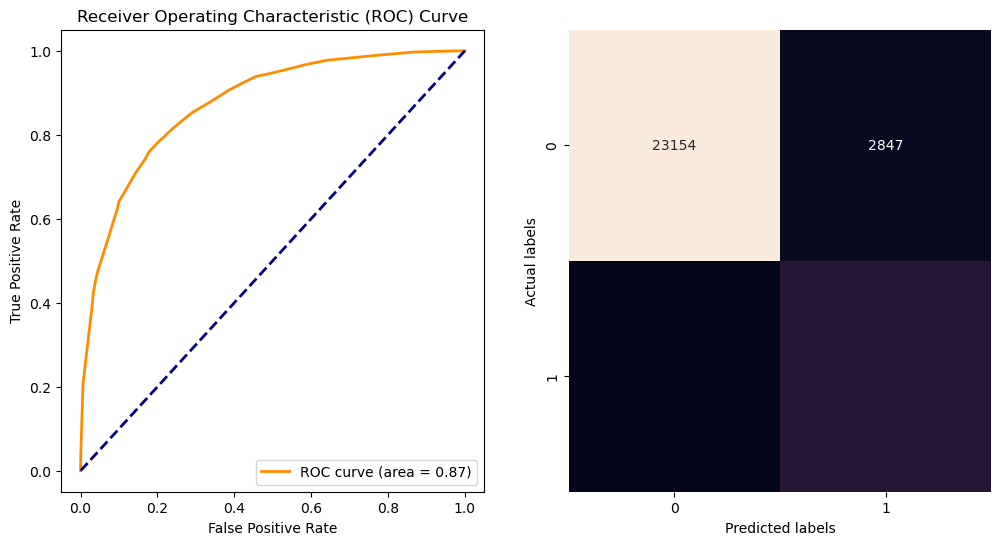

In [156]:
acc, f1, roc_auc = Metrics(grid_search_tree, X_train, y_train, X_test, y_test)

## Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
# Construction du pipeline pour le Random Forest
pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres de classe
    ('rf', RandomForestClassifier())  # Classifieur Random Forest
])
# Afficher le pipeline pour vérification
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('rf', RandomForestClassifier())])

In [ ]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_rf.fit(X_train, y_train)

In [14]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_rf = pipeline_rf.predict(X_train)
y_test_pred_rf = pipeline_rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest - Train Accuracy: {train_acc_rf:.4f}, Test Accuracy: {test_acc_rf:.4f}")
print(classification_report(y_test, y_test_pred_rf))


Random Forest - Train Accuracy: 0.9997, Test Accuracy: 0.8513
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26001
           1       0.66      0.61      0.63      6982

    accuracy                           0.85     32983
   macro avg       0.78      0.76      0.77     32983
weighted avg       0.85      0.85      0.85     32983



In [68]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_rf = {
   # 'rf__n_estimators': [100, 200],  # Nombre d'arbres dans le forest
    #'rf__max_depth': [None, 10, 20],  # Profondeur maximale de chaque arbre
    'rf__min_samples_split': [3, 6],  # Nombre minimal d'échantillons requis pour diviser un nœud interne
    'rf__min_samples_leaf': [1, 2],  # Nombre minimal d'échantillons requis pour être à un nœud feuille
    #'rf__bootstrap': [True, False],  # Si l'échantillonnage avec remplacement est utilisé pour construire les arbres
    #'smote__sampling_strategy': [0.7, 1] 
}
# Configuration de la recherche par grille
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)

In [69]:
%%time
grid_search_rf.fit(X_train, y_train)


CPU times: total: 41.8 s
Wall time: 2min 51s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__min_samples_leaf': [1, 2],
                         'rf__min_samples_split': [3, 6]},
             scoring='accuracy')

In [70]:
# Meilleurs paramètres et estimation du modèle
best_rf = grid_search_rf.best_estimator_
best_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('rf', RandomForestClassifier(min_samples_split=6))])

In [71]:
print(f"Best f1 score: {grid_search_rf.best_score_}")
best_param_rf = grid_search_rf.best_params_
print(f"Best parameters for Random Forest: {best_param_rf}")

Best f1 score: 0.8527909162573525
Best parameters for Random Forest: {'rf__min_samples_leaf': 1, 'rf__min_samples_split': 6}


Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    104001
           1       0.95      0.93      0.94     27927

    accuracy                           0.98    131928
   macro avg       0.97      0.96      0.96    131928
weighted avg       0.98      0.98      0.98    131928

Metriques obtenues sur le test
Accuracy:  0.8529242336961464
F1 Score:  0.8510173269672879
AUC(ROC):  0.767324791432399

Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.92      0.91     26001
           1       0.66      0.62      0.64      6982

    accuracy                           0.85     32983
   macro avg       0.78      0.77      0.77     32983
weighted avg       0.85      0.85      0.85     32983



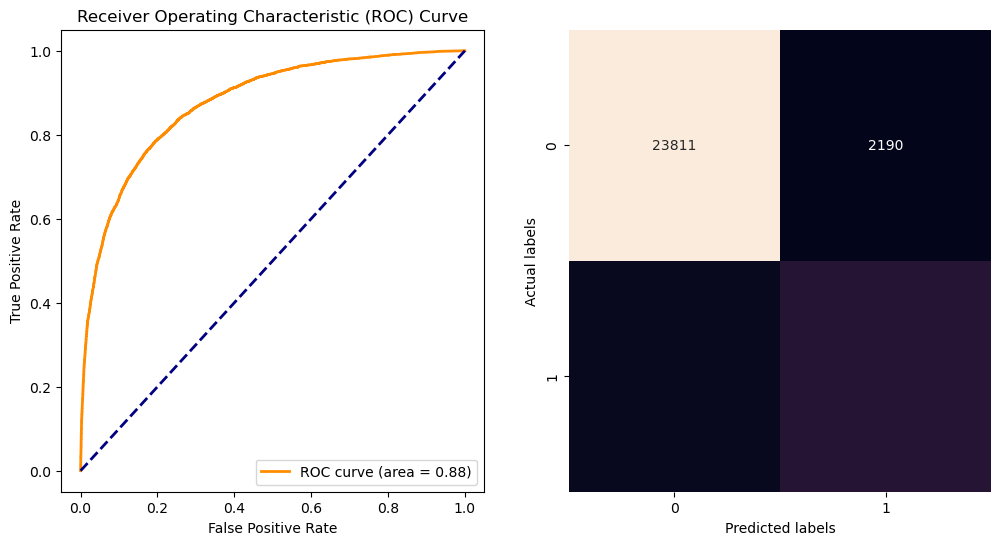

In [72]:
acc, f1, roc_auc = Metrics(grid_search_rf, X_train, y_train, X_test, y_test)

## Perceptron

In [17]:
from sklearn.linear_model import Perceptron

In [18]:
# Construction du pipeline pour le Perceptron
pipeline_perceptron = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(sampling_strategy=0.7,random_state=42)),  # Gestion des déséquilibres de classe
    ('perceptron', Perceptron())  # Classifieur Perceptron
])
pipeline_perceptron

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('perceptron', Perceptron())])

In [19]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_perceptron.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('perceptron', Perceptron())])

In [20]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_perceptron = pipeline_perceptron.predict(X_train)
y_test_pred_perceptron = pipeline_perceptron.predict(X_test)

train_acc_perceptron = accuracy_score(y_train, y_train_pred_perceptron)
test_acc_perceptron = accuracy_score(y_test, y_test_pred_perceptron)

print(f"Perceptron - Train Accuracy: {train_acc_perceptron:.4f}, Test Accuracy: {test_acc_perceptron:.4f}")
print(classification_report(y_test, y_test_pred_perceptron))


Perceptron - Train Accuracy: 0.6750, Test Accuracy: 0.6747
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     26001
           1       0.33      0.52      0.40      6982

    accuracy                           0.67     32983
   macro avg       0.59      0.62      0.59     32983
weighted avg       0.74      0.67      0.70     32983



In [21]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_perceptron = {
    'perceptron__alpha': [0.01, 0.1],  # Paramètre de régularisation
    'perceptron__max_iter': [1000, 2000],  # Nombre maximal d'itérations
    'perceptron__tol': [1e-3, 1e-4, 1e-5],  # Tolérance pour la convergence
    'smote__sampling_strategy': [0.7, 1] 
}
# Configuration de la recherche par grille
grid_search_perceptron = GridSearchCV(pipeline_perceptron, param_grid_perceptron, cv=5, scoring='accuracy', n_jobs=-1)

In [23]:
%%time
# Exécution de la recherche par grille sur les données d'entraînement

grid_search_perceptron.fit(X_train, y_train)

CPU times: total: 8.86 s
Wall time: 3min 48s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote',
                                        SMOTE(random_state=42,
                                              sampling_strategy=0.7)),
                                       ('perceptron', Perceptron())]),
             n_jobs=-1,
             param_grid={'perceptron__alpha': [0.01, 0.1],
                         'perceptron__max_iter': [1000, 2000],
                         'perceptron__tol': [0.001, 0.0001, 1e-05],
                         'smote__sampling_strategy': [0.7, 1]},
             scoring='accuracy')

In [24]:
# Meilleurs paramètres
best_perceptron = grid_search_perceptron.best_estimator_
best_perceptron

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),
                ('perceptron', Perceptron(alpha=0.01, tol=0.0001))])

In [25]:
# Estimation du modèle
print(f"Best f1 score: {grid_search_perceptron.best_score_}")
best_param_perceptron = grid_search_perceptron.best_params_
print(f"Best parameters for Perceptron: {best_param_perceptron}")

Best f1 score: 0.6645968824722732
Best parameters for Perceptron: {'perceptron__alpha': 0.01, 'perceptron__max_iter': 1000, 'perceptron__tol': 0.0001, 'smote__sampling_strategy': 0.7}


In [28]:
# Prédictions et évaluation du modèle optimisé sur les ensembles de train et de test
y_train_pred_best_perceptron = best_perceptron.predict(X_train)
y_test_pred_best_perceptron = best_perceptron.predict(X_test)

print("Metriques obtenues sur le train")
print(classification_report(y_train, y_train_pred_best_perceptron))
print("Metriques obtenues sur le test")
print(classification_report(y_test, y_test_pred_best_perceptron))

Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.85      0.71      0.78    104001
           1       0.33      0.53      0.41     27927

    accuracy                           0.68    131928
   macro avg       0.59      0.62      0.59    131928
weighted avg       0.74      0.68      0.70    131928

Metriques obtenues sur le test
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     26001
           1       0.33      0.52      0.40      6982

    accuracy                           0.67     32983
   macro avg       0.59      0.62      0.59     32983
weighted avg       0.74      0.67      0.70     32983



## Clustering

In [12]:
from sklearn.cluster import KMeans

import warnings
# filter warnings
warnings.filterwarnings('ignore')
#

In [35]:
X_p=preprocessor.fit_transform(X_train)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_p)
X_scaled_df = pd.DataFrame(X_scaled)

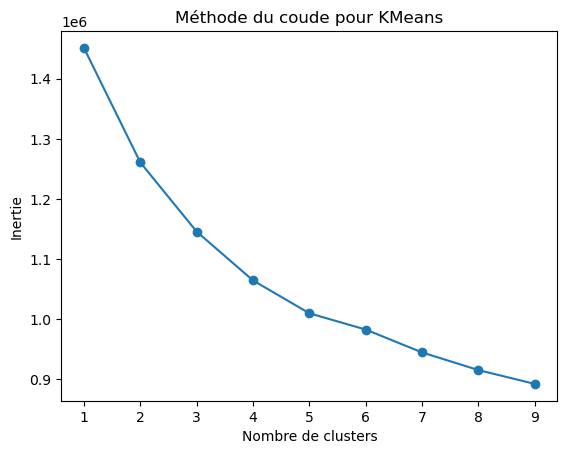

In [36]:
 #Liste des nombres de clusters à tester
k_values = range(1, 10)

# Liste pour stocker les inerties pour chaque nombre de clusters
inertia_values = []
# Entraîner KMeans pour chaque nombre de clusters et calculer l'inertie
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Tracer la courbe de l'inertie en fonction du nombre de clusters
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude pour KMeans')
plt.show()

In [37]:
kmeans2 = KMeans(n_clusters = 3)
kmeans2.fit(X_scaled)

KMeans(n_clusters=3)

In [38]:
pd.Series(kmeans2.labels_).value_counts()

0    75268
1    28862
2    27798
Name: count, dtype: int64

In [39]:
kmeans2.cluster_centers_

array([[ 2.26015751e-02, -5.16196605e-01, -5.29182533e-01,
        -4.69367552e-03, -5.92911915e-02,  4.20550797e-03,
        -2.92185432e-01,  5.65757703e-02,  1.38563519e-02,
         1.71188133e-02, -8.56561193e-04],
       [ 1.82070199e-02, -5.16229202e-01,  1.88970712e+00,
         2.74219844e-03, -2.46896854e-02,  8.08313725e-03,
        -2.48406406e-01,  4.86625939e-02, -2.68620301e-02,
         2.44600656e-02, -1.95588881e-02],
       [-8.00868988e-02,  1.93332956e+00, -5.29182533e-01,
         9.85970300e-03,  1.86140779e-01, -1.97762341e-02,
         1.04886519e+00, -2.03676662e-01, -9.62493921e-03,
        -7.17357303e-02,  2.26234389e-02]])

In [40]:
X_scaled_k2 = X_scaled_df.assign(classe=kmeans2.labels_)
X_scaled_k2.groupby("classe").mean()

,0,1,2,3,4,5,6,7,8,9,10
classe,,,,,,,,,,,
0,0.022593,-0.516197,-0.529183,-0.004703,-0.059190,0.004214,-0.292058,0.056519,0.013886,0.017118,-0.000847
1,0.018207,-0.516229,1.889707,0.002742,-0.024690,0.008083,-0.248406,0.048663,-0.026862,0.024460,-0.019559
2,-0.080080,1.933682,-0.529183,0.009888,0.185902,-0.019804,1.048713,-0.203560,-0.009708,-0.071747,0.022602


In [41]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

pca = PCA(n_components=2)
X_scaled_ = pca.fit_transform(X_scaled)
X_scaled_df = pd.DataFrame({
    "Dim1" : X_scaled[:,0], 
    "Dim2" : X_scaled[:,1],
    })
X_scaled_df

,Dim1,Dim2
0,0.878100,-0.516229
1,-1.138822,-0.516229
2,-1.138822,-0.516229
3,-1.138822,-0.516229
4,0.878100,-0.516229
...,...,...
131923,-1.138822,1.937124
131924,0.878100,-0.516229
131925,0.878100,-0.516229
131926,0.878100,-0.516229


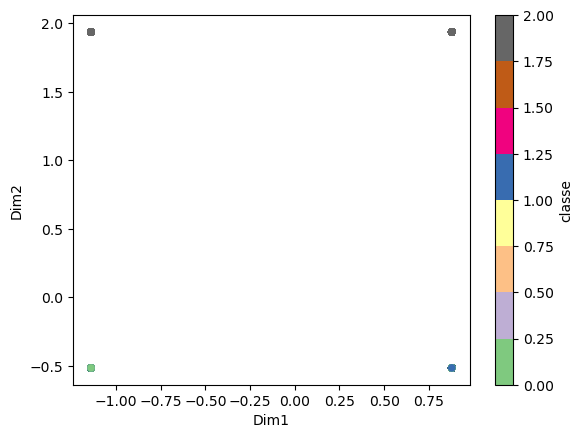

In [42]:
X_scaled_df = X_scaled_df.assign(classe = kmeans2.labels_)
X_scaled_df.plot.scatter(x = "Dim1", y = "Dim2", c = "classe", cmap = "Accent")
plt.show()

In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as shc
from sklearn.decomposition import TruncatedSVD
from sklearn.utils import resample


#### Vue que nous n'avons n'avons pas assez de memoire nous allons previsualiser juste pour our un echantillon de taille 100

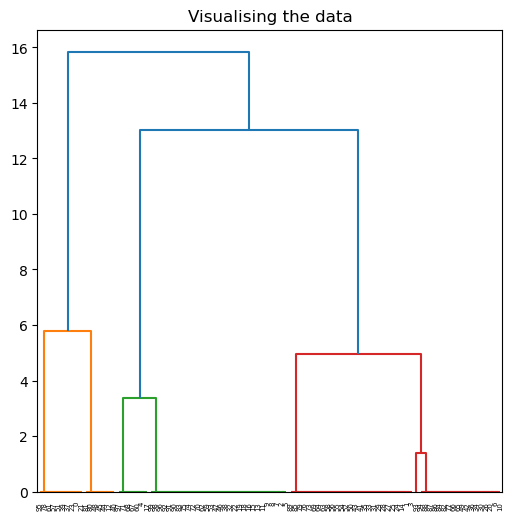

In [44]:
 
X_sample = resample(X_scaled_df, n_samples=100, random_state=42)

# Convertir en DataFrame
X_sample_df = pd.DataFrame(X_sample)

# Calculer le dendrogramme sur les données réduites
plt.figure(figsize=(6, 6))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_sample_df, method='ward')))

#### Modelisation avec pipepline

In [57]:
# Construction du pipeline pour KMeans
pipeline_kmeans = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE( random_state=42)),  # Gestion des déséquilibres de classe
    ('pca', PCA(n_components=2)),   # Réduction de dimensionnalité
    ('kmeans', KMeans(n_clusters=3, random_state=42)) ])

# Afficher le pipeline pour vérification
pipeline_kmeans

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [58]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_kmeans.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

In [59]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_Kmeans = pipeline_kmeans.predict(X_train)
y_test_pred_Kmeans = pipeline_kmeans.predict(X_test)

train_acc_Kmeans = accuracy_score(y_train, y_train_pred_Kmeans)
test_acc_Kmeans = accuracy_score(y_test, y_test_pred_Kmeans)

print(f"Clustering - Train Accuracy: {train_acc_Kmeans:.4f}, Test Accuracy: {test_acc_Kmeans:.4f}")
print(classification_report(y_test, y_test_pred_Kmeans))

Clustering - Train Accuracy: 0.3029, Test Accuracy: 0.3050
              precision    recall  f1-score   support

           0       0.69      0.29      0.40     26001
           1       0.37      0.37      0.37      6982
           2       0.00      0.00      0.00         0

    accuracy                           0.31     32983
   macro avg       0.35      0.22      0.26     32983
weighted avg       0.62      0.31      0.40     32983



In [29]:
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_kmeans = {
    'kmeans__init': ['k-means++', 'random'],  # Méthode d'initialisation des centroides
    'kmeans__n_init': [10, 20, 30],  # Nombre d'exécutions différentes de KMeans
    'kmeans__max_iter': [100, 200, 300],  # Nombre maximal d'itérations
    'kmeans__random_state': [42],  # État aléatoire pour la reproductibilité
    'smote__sampling_strategy': [ 0.5, 0.7, 1.0],
}

# Configuration de la recherche par grille
grid_search_kmeans = GridSearchCV(pipeline_kmeans, param_grid_kmeans, cv=5, scoring='accuracy', n_jobs=-1)

In [30]:
%%time
grid_search_kmeans.fit(X_train, y_train)

CPU times: total: 31.1 s
Wall time: 10min 57s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('gender',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gender']),
                                                                        ('geography',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Geography'])])),
                                       ('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('pca', PCA(n_components=2)),
                                       ('kmeans',
                                        KMeans(n_clusters=3,
                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'kmeans__init': ['k-means++', 'random'],
                         'kmeans__max_iter': [100, 200, 300],
                         'kmeans__n_init': [10, 20, 30],
                         'kmeans__random_state': [42],
                         'smote__sampling_strategy': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [60]:
# Meilleurs paramètres et estimation du modèle
best_kmeans = grid_search_kmeans.best_estimator_
best_kmeans

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()),
                ('smote', SMOTE(random_state=42, sampling_strategy=0.5)),
                ('pca', PCA(n_components=2)),
                ('kmeans',
                 KMeans(max_iter=100, n_clusters=3, n_init=20,
                        random_state=42))])

In [61]:
print(f"Best f1 score: {grid_search_kmeans.best_score_}")
best_param_kmeans = grid_search_kmeans.best_params_
print(f"Best parameters for KMeans: {best_param_kmeans}")

Best f1 score: 0.4619858384137734
Best parameters for KMeans: {'kmeans__init': 'k-means++', 'kmeans__max_iter': 100, 'kmeans__n_init': 20, 'kmeans__random_state': 42, 'smote__sampling_strategy': 0.5}


In [62]:
# Prédictions et évaluation du modèle optimisé sur les ensembles de train et de test
y_train_pred_best_kmeans = best_kmeans.predict(X_train)
y_test_pred_best_kmeans = best_kmeans.predict(X_test)

print("Metriques obtenues sur le train")
print(classification_report(y_train, y_train_pred_best_kmeans))
print("Metriques obtenues sur le test")
print(classification_report(y_test, y_test_pred_best_kmeans))

Metriques obtenues sur le train
              precision    recall  f1-score   support

           0       0.93      0.53      0.68    104001
           1       0.31      0.41      0.36     27927
           2       0.00      0.00      0.00         0

    accuracy                           0.51    131928
   macro avg       0.42      0.32      0.34    131928
weighted avg       0.80      0.51      0.61    131928

Metriques obtenues sur le test
              precision    recall  f1-score   support

           0       0.93      0.53      0.68     26001
           1       0.31      0.41      0.35      6982
           2       0.00      0.00      0.00         0

    accuracy                           0.51     32983
   macro avg       0.41      0.31      0.34     32983
weighted avg       0.80      0.51      0.61     32983



In [63]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score

In [64]:
# Transformer les ensembles d'entraînement et de test avec le modèle optimisé
X_train_transformed_optimized = best_kmeans.named_steps['preprocessor'].transform(X_train)
X_test_transformed_optimized = best_kmeans.named_steps['preprocessor'].transform(X_test)

# Prédire les clusters pour les ensembles d'entraînement et de test avec le modèle optimisé
train_clusters_optimized = best_kmeans.named_steps['kmeans'].fit_predict(X_train_transformed_optimized)
test_clusters_optimized = best_kmeans.named_steps['kmeans'].predict(X_test_transformed_optimized)

# Calculer le score de silhouette pour les clusters prédits avec le modèle optimisé
train_silhouette_score_optimized = silhouette_score(X_train_transformed_optimized, train_clusters_optimized)
test_silhouette_score_optimized = silhouette_score(X_test_transformed_optimized, test_clusters_optimized)

train_davies_bouldin_score_optimized = davies_bouldin_score(X_train_transformed_optimized, train_clusters_optimized)
test_davies_bouldin_score_optimized = davies_bouldin_score(X_test_transformed_optimized, test_clusters_optimized)

train_calinski_harabasz_score_optimized = calinski_harabasz_score(X_train_transformed_optimized, train_clusters_optimized)
test_calinski_harabasz_score_optimized = calinski_harabasz_score(X_test_transformed_optimized, test_clusters_optimized)

print("Paramètres optimisés :")
print("Score de silhouette sur l'ensemble d'entraînement avec le modèle optimisé :", train_silhouette_score_optimized)
print("Score de Davies sur l'ensemble d'entraînement avec le modèle optimisé :", train_davies_bouldin_score_optimized)
print("Score de Calinski-Harabasz sur l'ensemble d'entraînement avec le modèle optimisé :", train_calinski_harabasz_score_optimized)

print("Score de silhouette sur l'ensemble de test avec le modèle optimisé :", test_silhouette_score_optimized)
print("Score de Davies sur l'ensemble de test avec le modèle optimisé :", test_davies_bouldin_score_optimized)
print("Score de Calinski-Harabasz sur l'ensemble de test avec le modèle optimisé :", test_calinski_harabasz_score_optimized)

Paramètres optimisés :
Score de silhouette sur l'ensemble d'entraînement avec le modèle optimisé : 0.536652730199234
Score de Davies sur l'ensemble d'entraînement avec le modèle optimisé : 0.568737270595495
Score de Calinski-Harabasz sur l'ensemble d'entraînement avec le modèle optimisé : 175135.16304566574
Score de silhouette sur l'ensemble de test avec le modèle optimisé : 0.534907629767645
Score de Davies sur l'ensemble de test avec le modèle optimisé : 0.5690414687762728
Score de Calinski-Harabasz sur l'ensemble de test avec le modèle optimisé : 43515.20734702048


## SVM

In [73]:
from sklearn.svm import SVC

In [74]:
# Construction du pipeline pour SVM
pipeline_svm = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),  # Normalisation des données
    ('smote', SMOTE(random_state=42)),  # Gestion des déséquilibres de classe
    ('svm', SVC())  # Classifieur SVM
])
pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('svm', SVC())])

In [41]:
# Entraîner le pipeline sur les données d'entraînement
pipeline_svm.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gender']),
                                                 ('geography',
                                                  OneHotEncoder(drop='first'),
                                                  ['Geography'])])),
                ('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('svm', SVC())])

In [42]:
# Prédictions et évaluation du modèle sur les ensembles de train et de test
y_train_pred_svm = pipeline_svm.predict(X_train)
y_test_pred_svm = pipeline_svm.predict(X_test)

train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"SVM - Train Accuracy: {train_acc_svm:.4f}, Test Accuracy: {test_acc_svm:.4f}")
print(classification_report(y_test, y_test_pred_svm))

SVM - Train Accuracy: 0.8108, Test Accuracy: 0.8063
              precision    recall  f1-score   support

           0       0.94      0.81      0.87     26001
           1       0.53      0.79      0.63      6982

    accuracy                           0.81     32983
   macro avg       0.73      0.80      0.75     32983
weighted avg       0.85      0.81      0.82     32983



In [75]:
from sklearn.model_selection import GridSearchCV
# Définir la grille de paramètres pour la recherche exhaustive
param_grid_svm = {
    'svm__C': [0.1, 1, 10],  # Paramètre de régularisation
    #'svm__kernel': ['linear', 'poly', 'sigmoid'],  # Noyau SVM
}
# Configuration de la recherche par grille
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
%%time
grid_search_svm.fit(X_train, y_train)

In [ ]:
# Meilleurs paramètres et estimation du modèle
best_svm = grid_search_svm.best_estimator_
print(f"Best parameters for SVM: {grid_search_svm.best_params_}")

In [ ]:
# Prédictions et évaluation du modèle optimisé sur les ensembles de train et de test
y_train_pred_best_svm = best_svm.predict(X_train)
y_test_pred_best_svm = best_svm.predict(X_test)

print("Metriques obtenues sur le train")
print(classification_report(y_train, y_train_pred_best_svm))
print("Metriques obtenues sur le test")
print(classification_report(y_test, y_test_pred_best_best_svm))

In [ ]:
acc, f1, roc_auc = Metrics(grid_search_svm, X_train, y_train, X_test, y_test)

<div style="border: 1px solid RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color: RGB(51,165,182); "> Choix du meilleur model </h2>
</div>

\begin{equation*}
Modèle  
\begin{vmatrix} \\
Métrique & & & weighted - avg \\
 & Accuracy &  f1-score & precision & recall  \\
\hline \\
RegressionLogistics & 0.80 & 0.81 & 0.82 & 0.80 \\
MultinomialNB & 0.59 & 0.63 & 0.72 & 0.59  \\
DecisionTree & 0.84 & 0.84 & 0.84 & 0.84 \\
KNN & 0.82 & 0.82 & 0.83 & 0.82 \\
Perceptron & 0.67 & 0.70 & 0.74 & 0.67 \\
XGBoost & 0.86 & 0.86 & 0.86 & 0.86 \\
RandomForest & 0.85 & 0.85 & 0.85 & 0.85\\
Cluster / Kmeans & 0.51 & 0.61 & 0.80 & 0.51\\
SVM & 0.81 & 0.82 & 0.85 & 0.81
\end{vmatrix}
\end{equation*}



\begin{equation*}
\text{Modèle  retenu est *XGBOOST* }
\end{equation*}

- Ainsi pour identifier les clients susceptibles de quitter la banque et r Réduire le churn en prenant des mesures préventives ciblées pour retenir les clients à haut risq, ce serait de se référer au modèle XGBOOST..
